In [1]:
from collections import defaultdict, OrderedDict
from keras.models import load_model
# from scipy.ndimage.morphology import binary_fill_holes
from skimage import io
from skimage import measure
from skimage.morphology import dilation
from skimage.morphology import disk

import argparse
import copy
import cv2
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

%matplotlib inline

Using TensorFlow backend.


In [2]:
img_path = "./CAMHDA301-20180712T001500_1259.png"

In [3]:
frame = io.imread(img_path)

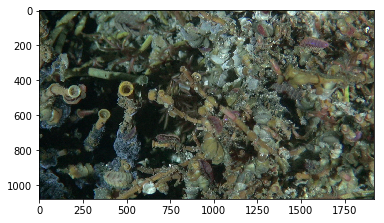

In [4]:
plt.imshow(frame)

In [5]:
patch_size = 256
stride_size = patch_size // 2

if frame.shape[0] % stride_size == 0:
    height_adjustment = 0
else:
    height_adjustment = stride_size - (frame.shape[0] % stride_size)

if frame.shape[1] % stride_size == 0:
    width_adjustment = 0
else:
    width_adjustment = stride_size - (frame.shape[1] % stride_size)

adjusted_frame = cv2.copyMakeBorder(frame,
                                        top=height_adjustment // 2,
                                        bottom=height_adjustment // 2,
                                        left=width_adjustment // 2,
                                        right=width_adjustment // 2,
                                        borderType=cv2.BORDER_CONSTANT,
                                        value=0)
padded_frame = cv2.copyMakeBorder(adjusted_frame,
                                      top=stride_size,
                                      bottom=stride_size,
                                      left=stride_size,
                                      right=stride_size,
                                      borderType=cv2.BORDER_CONSTANT,
                                      value=0)


In [6]:
frame.shape, padded_frame.shape, width_adjustment, height_adjustment

((1080, 1920, 3), (1408, 2176, 3), 0, 72)

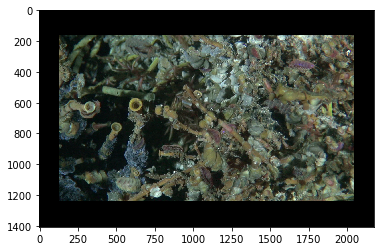

In [7]:
plt.imshow(padded_frame)

In [8]:
stride_overalayed_image = copy.copy(padded_frame)
patches = []
c = 0
for ri in range(stride_size, padded_frame.shape[0] - stride_size + 1, stride_size):
    for ci in range(stride_size, padded_frame.shape[1] - stride_size + 1, stride_size):
        c += 1
        center_coord = (ci, ri)
        patch_x = int(center_coord[0] - patch_size / 2)
        patch_y = int(center_coord[1] - patch_size / 2)
        patch = padded_frame[patch_y:patch_y + patch_size, patch_x:patch_x + patch_size]
        patches.append(patch)
        
        top_left = (patch_x, patch_y)
        bottom_right = (patch_x + patch_size, patch_y + patch_size)
        print(center_coord, top_left, bottom_right)

        if c % 2 == 0:
            color = (0,255,0)
        else:
            color = (255,0,0)
        stride_overalayed_image = cv2.rectangle(stride_overalayed_image,
                                                top_left,
                                                bottom_right,
                                                color=color,
                                                thickness=3)


(128, 128) (0, 0) (256, 256)
(256, 128) (128, 0) (384, 256)
(384, 128) (256, 0) (512, 256)
(512, 128) (384, 0) (640, 256)
(640, 128) (512, 0) (768, 256)
(768, 128) (640, 0) (896, 256)
(896, 128) (768, 0) (1024, 256)
(1024, 128) (896, 0) (1152, 256)
(1152, 128) (1024, 0) (1280, 256)
(1280, 128) (1152, 0) (1408, 256)
(1408, 128) (1280, 0) (1536, 256)
(1536, 128) (1408, 0) (1664, 256)
(1664, 128) (1536, 0) (1792, 256)
(1792, 128) (1664, 0) (1920, 256)
(1920, 128) (1792, 0) (2048, 256)
(2048, 128) (1920, 0) (2176, 256)
(128, 256) (0, 128) (256, 384)
(256, 256) (128, 128) (384, 384)
(384, 256) (256, 128) (512, 384)
(512, 256) (384, 128) (640, 384)
(640, 256) (512, 128) (768, 384)
(768, 256) (640, 128) (896, 384)
(896, 256) (768, 128) (1024, 384)
(1024, 256) (896, 128) (1152, 384)
(1152, 256) (1024, 128) (1280, 384)
(1280, 256) (1152, 128) (1408, 384)
(1408, 256) (1280, 128) (1536, 384)
(1536, 256) (1408, 128) (1664, 384)
(1664, 256) (1536, 128) (1792, 384)
(1792, 256) (1664, 128) (1920, 384

In [10]:
io.imsave("./stride_display.png", stride_overalayed_image)

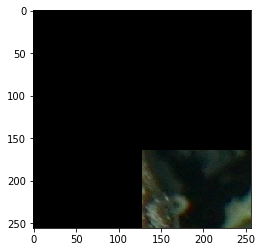

In [69]:
plt.imshow(patches[0])

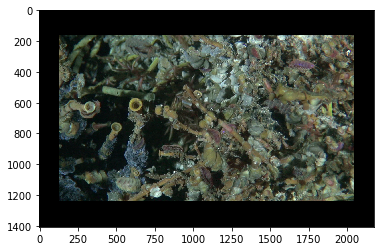

In [63]:
plt.imshow(padded_frame)

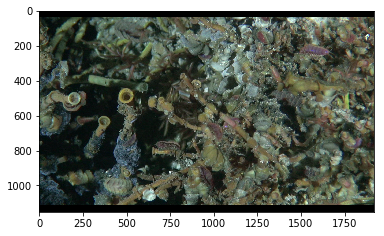

In [64]:
plt.imshow(adjusted_frame)

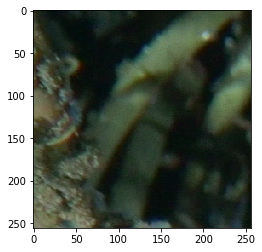